## Loading the Data

We will be working with the Babi Data Set from Facebook Research.

Full Details: https://research.fb.com/downloads/babi/

- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698


In [2]:
import pickle
import numpy as np

In [3]:
with open("train_qa.dat", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [4]:
with open("test_qa.dat", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

----

## Exploring the Format of the Data

In [11]:
type(test_data)

list

In [12]:
type(train_data)

list

In [13]:
len(test_data)

1000

In [14]:
len(train_data)

10000

In [15]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [16]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [17]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [18]:
train_data[0][2]

'no'

-----

## Setting up Vocabulary of All Words

In [20]:
# Create a set that holds the vocab words
vocab = set()

In [21]:
all_data = test_data + train_data

In [22]:
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [23]:
vocab.add('no')
vocab.add('yes')

In [24]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [25]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences

In [26]:
max_story_len = max([len(data[0]) for data in all_data])

In [27]:
max_story_len

156

In [28]:
max_question_len = max([len(data[1]) for data in all_data])

In [29]:
max_question_len

6

## Vectorizing the Data

In [30]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [31]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

-----------

In [32]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [33]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [34]:
tokenizer.word_index

{'back': 1,
 '?': 2,
 'hallway': 3,
 'up': 4,
 'milk': 5,
 'office': 6,
 'dropped': 7,
 'grabbed': 8,
 'kitchen': 9,
 'to': 10,
 'moved': 11,
 'travelled': 12,
 'no': 13,
 'the': 14,
 '.': 15,
 'sandra': 16,
 'apple': 17,
 'football': 18,
 'down': 19,
 'there': 20,
 'is': 21,
 'in': 22,
 'took': 23,
 'journeyed': 24,
 'daniel': 25,
 'put': 26,
 'bathroom': 27,
 'bedroom': 28,
 'john': 29,
 'discarded': 30,
 'left': 31,
 'went': 32,
 'picked': 33,
 'garden': 34,
 'yes': 35,
 'got': 36,
 'mary': 37}

In [35]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [36]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [37]:
len(train_story_text)

10000

In [38]:
len(train_story_seq)

10000

In [39]:
# word_index = tokenizer.word_index

### Functionalize Vectorization

In [40]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT:

    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:

    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.

    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''


    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []


    for story, query, answer in data:

        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]

        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)

        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1

        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)

    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.

    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [41]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [42]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [43]:
inputs_test

array([[ 0,  0,  0, ..., 14, 28, 15],
       [ 0,  0,  0, ..., 14, 34, 15],
       [ 0,  0,  0, ..., 14, 34, 15],
       ...,
       [ 0,  0,  0, ..., 14, 17, 15],
       [ 0,  0,  0, ..., 14, 34, 15],
       [ 0,  0,  0, ..., 17, 20, 15]], dtype=int32)

In [44]:
queries_test

array([[21, 29, 22, 14,  9,  2],
       [21, 29, 22, 14,  9,  2],
       [21, 29, 22, 14, 34,  2],
       ...,
       [21, 37, 22, 14, 28,  2],
       [21, 16, 22, 14, 34,  2],
       [21, 37, 22, 14, 34,  2]], dtype=int32)

In [45]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [46]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 497.,   0.,   0.])

In [47]:
tokenizer.word_index['yes']

35

In [48]:
tokenizer.word_index['no']

13

## Creating the Model

In [49]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

### Placeholders for Inputs

Recall we technically have two inputs, stories and questions. So we need to use placeholders. `Input()` is used to instantiate a Keras tensor.


In [51]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

### Building the Networks

To understand why we chose this setup, make sure to read the paper we are using:

* Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  "End-To-End Memory Networks",
  http://arxiv.org/abs/1503.08895

## Encoders

### Input Encoder m

In [52]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

### Input Encoder c

In [53]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

### Question Encoder

In [54]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

/opt/anaconda3/envs/cvenv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Encode the Sequences

In [55]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

##### Use dot product to compute the match between first input vector seq and the query

In [56]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

#### Add this match matrix with the second input vector sequence

In [57]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

#### Concatenate

In [58]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [59]:
answer

<KerasTensor shape=(None, 6, 220), dtype=float32, sparse=False, name=keras_tensor_18>

In [60]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [61]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [62]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 156)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 156, 64)   │      2,432 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 6, 64)     │      2,432 │ input_layer_1[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 156, 6)    │          0 │ sequential[0][0], │
│                     │                   │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 156, 6)    │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 156, 6)    │        228 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 156, 6)    │          0 │ activation[0][0], │
│                     │                   │            │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 6, 156)    │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 6, 220)    │          0 │ permute[0][0],    │
│ (Concatenate)       │                   │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 32)        │     32,384 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 38)        │      1,254 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 38)        │          0 │ dense[0][0]       │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,730 (151.29 KB)

 Trainable params: 38,730 (151.29 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120


/opt/anaconda3/envs/cvenv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4759 - loss: 1.3844 - val_accuracy: 0.5030 - val_loss: 0.6957
Epoch 2/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5041 - loss: 0.7132 - val_accuracy: 0.4960 - val_loss: 0.6937
Epoch 3/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5013 - loss: 0.7002 - val_accuracy: 0.5030 - val_loss: 0.6937
Epoch 4/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5032 - loss: 0.6969 - val_accuracy: 0.5030 - val_loss: 0.6939
Epoch 5/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5018 - loss: 0.6950 - val_accuracy: 0.5030 - val_loss: 0.6936
Epoch 6/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4975 - loss: 0.6952 - val_accuracy: 0.5030 - val_loss: 0.6948
Epoch 7/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5041 - loss: 0.6956 - val_accuracy: 0.5030 - val_loss: 0.6937
Epoch 8/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4883 - loss: 0.6959 - val_accuracy: 0.502

### Saving the Model

In [57]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

## Evaluating the Model

### Plotting Out Training History

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


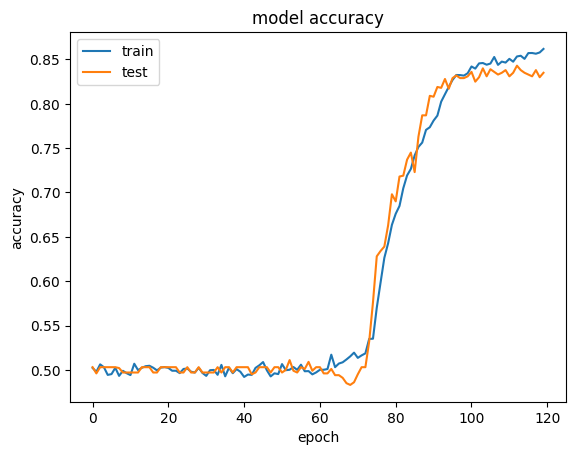

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating on Given Test Set

In [59]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step

/opt/anaconda3/envs/cvenv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [60]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [61]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [62]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [63]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [64]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9892381


## Writing Your Own Stories and Questions

Remember you can only use words from the existing vocab

In [65]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [66]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [67]:
my_question = "Is the football in the garden ?"

In [68]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [69]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [70]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [71]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [72]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.58955956


# Great Job!

# Answer the following questions.

•Suppose you want a chatbot with an extensive vocabulary.


•How to add more words to the vocabulary?


•What are the steps required after expanding the vocabulary?

To expand the vocabulary of the chatbot:

1) manaully add the word to xpanding the vocabulary set.

In [73]:
vocab.add('maybe')

2. Updating the tokenizer and Re-vectorizing the datase

In [74]:
tokenizer.fit_on_texts(vocab)
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding
new_word_index = tokenizer.texts_to_sequences(["maybe"])

inputs_train, queries_train, answers_train = vectorize_stories(train_data)
inputs_test, queries_test, answers_test = vectorize_stories(test_data)


3. update the embedding layers

The embedding layer's input_dim (vocabulary size) defines how many unique words it can handle so we must update the embedding layers whenever we expand the vocabulary, If we add new words but don't update input_dim, the model won't recognize them, leading to key errors during inference.

In [75]:
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))


/opt/anaconda3/envs/cvenv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4) retrain again

In [76]:
history2 = model.fit([inputs_train, queries_train], answers_train,
                    batch_size=32, epochs=120,
                    validation_data=([inputs_test, queries_test], answers_test))


Epoch 1/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8551 - loss: 0.3250 - val_accuracy: 0.8340 - val_loss: 0.3750
Epoch 2/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8682 - loss: 0.3162 - val_accuracy: 0.8370 - val_loss: 0.3814
Epoch 3/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8592 - loss: 0.3201 - val_accuracy: 0.8340 - val_loss: 0.3854
Epoch 4/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8623 - loss: 0.3201 - val_accuracy: 0.8290 - val_loss: 0.3902
Epoch 5/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8695 - loss: 0.3049 - val_accuracy: 0.8360 - val_loss: 0.3645
Epoch 6/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8739 - loss: 0.3043 - val_accuracy: 0.8390 - val_loss: 0.3706
Epoch 7/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8663 - loss: 0.3127 - val_accuracy: 0.8440 - val_loss: 0.3964
Epoch 8/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8731 - loss: 0.2951 - val_accu

plot the model

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


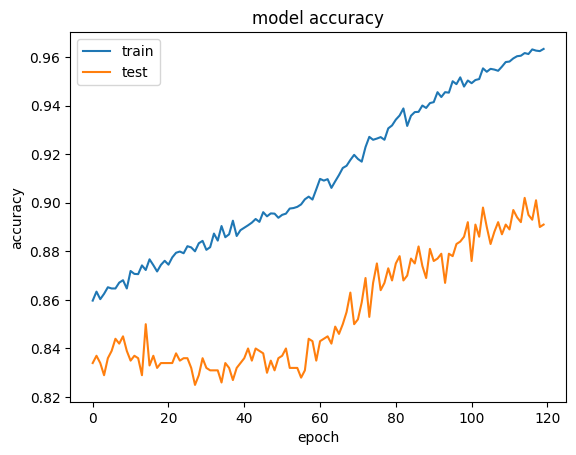

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
len(vocab)

38

37 is excluded the dot

## task 2

In [5]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer

def clean_text(text):
    # Add spaces around punctuation marks
    text = re.sub(r"([.!?])", r" \1 ", text)
    # Replace multiple whitespace characters
    text = re.sub(r"([.!?])", r" \1 ", text)
    return re.sub(r"\s+", " ", text).strip()

def process_data(data):
    vocab = set()
    cleaned_data = []
    for story, question, answer in data:
        cleaned_story = clean_text(" ".join(story)).split()
        cleaned_question = clean_text(" ".join(question)).split()
        vocab.update(cleaned_story)
        vocab.update(cleaned_question)
        cleaned_data.append((cleaned_story, cleaned_question, answer))
    return cleaned_data, vocab

# Clean and update the vocabulary
cleaned_train_data, train_vocab = process_data(train_data)
cleaned_test_data, test_vocab = process_data(test_data)

# Ensure that it is yes and no
vocab = train_vocab | test_vocab | {"yes", "no"}

# Fit the tokenizer on the cleaned vocabulary
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)


"""•Jane left the school. James dropped John at the ""airport.
•Is jane under the table?
•Is John at the airport?
"""

In [9]:
def augment_data(data):
    tense_variations = {
        "leaves": ["left", "will leave"],
        "drops": ["dropped", "will drop"],
        "is": ["was", "will be"],
        "goes": ["went", "will go"]
    }

    augmented_data = []
    for story, question, answer in data:
        augmented_data.append((story, question, answer))  # Add original data

        # Replace words with tense variations in both story and question
        for word, tenses in tense_variations.items():
            if word in story:
                for tense_word in tenses:
                    new_story = [tense_word if w == word else w for w in story]
                    augmented_data.append((new_story, question, answer))

            if word in question:
                for tense_word in tenses:
                    new_question = [tense_word if w == word else w for w in question]
                    augmented_data.append((story, new_question, answer))

    return augmented_data

# Apply augmentation
train_data_extended = augment_data(cleaned_train_data)
test_data_extended = augment_data(cleaned_test_data)



In [64]:
# Vectorize new dataset
inputs_train, queries_train, answers_train = vectorize_stories(train_data_extended)
inputs_test, queries_test, answers_test = vectorize_stories(test_data_extended)

# Retrain model
history3 = model.fit([inputs_train, queries_train], answers_train,
                    batch_size=32, epochs=120,
                    validation_data=([inputs_test, queries_test], answers_test))

# Save the updated model
model.save('chatbot_extended.h5')


Epoch 1/120


/opt/anaconda3/envs/cvenv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4809 - loss: 1.2007 - val_accuracy: 0.5030 - val_loss: 0.6987
Epoch 2/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5003 - loss: 0.7090 - val_accuracy: 0.4970 - val_loss: 0.6939
Epoch 3/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4971 - loss: 0.6993 - val_accuracy: 0.4970 - val_loss: 0.6960
Epoch 4/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4818 - loss: 0.6978 - val_accuracy: 0.4970 - val_loss: 0.6935
Epoch 5/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4993 - loss: 0.6955 - val_accuracy: 0.5030 - val_loss: 0.6933
Epoch 6/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5012 - loss: 0.6956 - val_accuracy: 0.4970 - val_loss: 0.6935
Epoch 7/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4978 - loss: 0.6951 - val_accuracy: 0.4970 - val_loss: 0.6945
Epoch 8/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5091 - loss: 0.6945 - val_accuracy: 0.4970

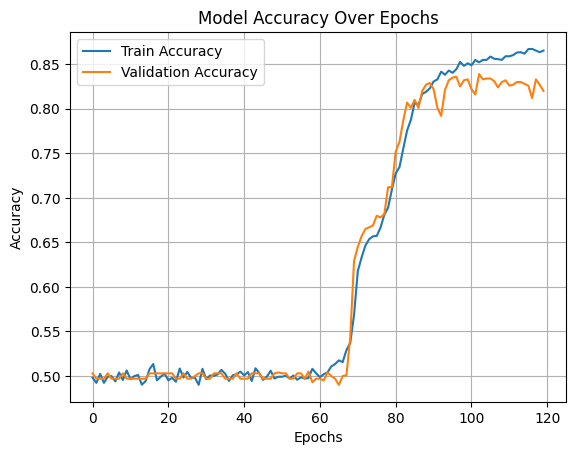

In [65]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
